In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.random.seed(sum(map(ord,'aesthetics')))
sns.set_style('ticks')
sns.set_context('paper',font_scale=2,rc={'lines.linewidth':2.5})

pos_type_names = ['exp_id','rep','weather','start_point','end_point','result','initial_distance','final_distance',
                  'final_time','time_out','num_ped','num_veh']
all_details_names=['exp_id','rep','weather','collision_gen','collision_ped','collision_car','lane_intersect',
                   'sidewalk_intersect','pos_x','pos_y','num_ped','num_veh']

class FI_Data(object):
    def __init__(self,town,f_i,fname_pose_type,fname_details):
        self.town=town
        self.f_i=f_i
        self.exp_by_pose_type = pd.read_csv(fname_pose_type,sep=',',names=pos_type_names,skiprows=1)
        self.exp_all_details = pd.read_csv(fname_details,sep=',',names=all_details_names,skiprows=1)
        
    def get_fi_name(self):
        return self.f_i
        
    def get_town_name(self):
        return self.town
    
    def get_exp_by_pose_type(self):
        return self.exp_by_pose_type
    
    def get_exp_all_details(self):
        return self.exp_all_details

In [2]:
DATASET = [
    FI_Data('Town1','NoInject','raw_csv1/test_uiuc_fi_2018_Town01_PassThrough/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_PassThrough/details_w1.3.6.8.csv'),
    FI_Data('Town2','NoInject','raw_csv1/test_uiuc_fi_2018_Town02_PassThrough/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_PassThrough/details_w1.3.6.8.csv'),
    FI_Data('Town1','Gaussian','raw_csv1/test_uiuc_fi_2018_Town01_Gaussian/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_Gaussian/details_w1.3.6.8.csv'),
    FI_Data('Town2','Gaussian','raw_csv1/test_uiuc_fi_2018_Town02_Gaussian/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_Gaussian/details_w1.3.6.8.csv'),
    FI_Data('Town1','S&P','raw_csv1/test_uiuc_fi_2018_Town01_SaltAndPepper/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_SaltAndPepper/details_w1.3.6.8.csv'),
    FI_Data('Town2','S&P','raw_csv1/test_uiuc_fi_2018_Town02_SaltAndPepper/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_SaltAndPepper/details_w1.3.6.8.csv'),
    FI_Data('Town1','SolidOcc','raw_csv1/test_uiuc_fi_2018_Town01_SolidOcclusion/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_SolidOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town2','SolidOcc','raw_csv1/test_uiuc_fi_2018_Town02_SolidOcclusion/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_SolidOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town1','TranspOcc','raw_csv1/test_uiuc_fi_2018_Town01_TransparentOcclusion/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_TransparentOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town2','TranspOcc','raw_csv1/test_uiuc_fi_2018_Town02_TransparentOcclusion/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_TransparentOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town1','WaterDrop','raw_csv1/test_uiuc_fi_2018_Town01_WaterDrop/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town01_WaterDrop/details_w1.3.6.8.csv'),
    FI_Data('Town2','WaterDrop','raw_csv1/test_uiuc_fi_2018_Town02_WaterDrop/w1.3.6.8.csv',
           'raw_csv1/test_uiuc_fi_2018_Town02_WaterDrop/details_w1.3.6.8.csv'),

    FI_Data('Town2','Gaussian','raw_csv2/test_uiuc_fi_2018_Town02_Gaussian/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town02_Gaussian/details_w1.3.6.8.csv'),
    FI_Data('Town1','S&P','raw_csv2/test_uiuc_fi_2018_Town01_SaltAndPepper/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town01_SaltAndPepper/details_w1.3.6.8.csv'),
    FI_Data('Town2','S&P','raw_csv2/test_uiuc_fi_2018_Town02_SaltAndPepper/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town02_SaltAndPepper/details_w1.3.6.8.csv'),
    FI_Data('Town1','SolidOcc','raw_csv2/test_uiuc_fi_2018_Town01_SolidOcclusion/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town01_SolidOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town2','SolidOcc','raw_csv2/test_uiuc_fi_2018_Town02_SolidOcclusion/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town02_SolidOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town1','TranspOcc','raw_csv2/test_uiuc_fi_2018_Town01_TransparentOcclusion/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town01_TransparentOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town2','TranspOcc','raw_csv2/test_uiuc_fi_2018_Town02_TransparentOcclusion/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town02_TransparentOcclusion/details_w1.3.6.8.csv'),
    FI_Data('Town1','WaterDrop','raw_csv2/test_uiuc_fi_2018_Town01_WaterDrop/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town01_WaterDrop/details_w1.3.6.8.csv'),
    FI_Data('Town2','WaterDrop','raw_csv2/test_uiuc_fi_2018_Town02_WaterDrop/w1.3.6.8.csv',
           'raw_csv2/test_uiuc_fi_2018_Town02_WaterDrop/details_w1.3.6.8.csv'),
    
]

In [3]:
#Function definitions to extract information from raw log files
#Credit to CARLA
sldist = lambda c1, c2: math.sqrt((c2[0] - c1[0])**2 + (c2[1] - c1[1])**2)

def get_distance_traveled(selected_matrix, header):

    prev_x = selected_matrix[0, header.index('pos_x')]
    prev_y = selected_matrix[0, header.index('pos_y')]

    i = 1
    acummulated_distance = 0
    while i < selected_matrix.shape[0]:

        x = selected_matrix[i, header.index('pos_x')]
        y = selected_matrix[i, header.index('pos_y')]
        # Here we defined a maximun distance in a tick, this case 8 meters or 288km/h
        if sldist((x, y), (prev_x, prev_y)) < 800:
            acummulated_distance += sldist((x, y), (prev_x, prev_y))


        prev_x = x
        prev_y = y

        i += 1

    return float(acummulated_distance)/float(100*1000)

def get_colisions(selected_matrix, header):

    count_gen = 0
    count_ped = 0
    count_car = 0
    i = 1

    while i < selected_matrix.shape[0]:
        if (selected_matrix[i, header.index('collision_gen')]
                - selected_matrix[(i-10), header.index('collision_gen')]) > 40000:
            count_gen += 1
            i += 20
        i += 1

    i = 1
    while i < selected_matrix.shape[0]:
        if (selected_matrix[i, header.index('collision_car')]
                - selected_matrix[(i-10), header.index('collision_car')]) > 40000:
            count_car += 1
            i += 30
        i += 1

    i = 1
    while i < selected_matrix.shape[0]:
        if (selected_matrix[i, header.index('collision_ped')]
                - selected_matrix[i-5, header.index('collision_ped')]) > 30000:
            count_ped += 1
            i += 100
        i += 1

    return count_gen, count_car, count_ped

def get_out_of_road_lane(selected_matrix, header):

    count_road = 0
    count_lane = 0

    i = 0

    while i < selected_matrix.shape[0]:
        # print selected_matrix[i,6]
        if (selected_matrix[i, header.index('sidewalk_intersect')]
                - selected_matrix[(i-10), header.index('sidewalk_intersect')]) > 0.3:
            count_road += 1
            i += 20
        if i >= selected_matrix.shape[0]:
            break

        if (selected_matrix[i, header.index('lane_intersect')]
                - selected_matrix[(i-10), header.index('lane_intersect')]) > 0.4:
            count_lane += 1
            i += 20

        i += 1

    return count_lane, count_road


In [4]:
infract_data = pd.DataFrame(columns=['FI', 'Town','Weather','Distance','col_gen', 'col_car', 'col_hum',
                                     'col_total','lane_out', 'swalk_out'])

weather_id_name=['Default','ClearNoon','CloudyNoon','WetNoon','WetCloudyNoon','MidRainyNoon',
                 'HardRainNoon','SoftRainNoon','ClearSunset','CloudySunset','WetSunset',
                 'WetCloudySunset','MidRainSunset','HardRainSunset','SoftRainSunset']


for FI in DATASET:

    df = FI.get_exp_all_details()
    
    unique_ids=np.unique(df["exp_id"].values)
    
    for exp_id in unique_ids:
        exp_mat = df.loc[df["exp_id"]==exp_id].values
        weather_id = np.unique((df.loc[df["exp_id"]==exp_id])["weather"].values)[0]
        
        km=get_distance_traveled(exp_mat,all_details_names)

        c_gen,c_car,c_ped = get_colisions(exp_mat,all_details_names)
        lane_out,swalk_out = get_out_of_road_lane(exp_mat,all_details_names)
        
        infract_data = infract_data.append({
            'FI':FI.get_fi_name(),
            'Town':FI.get_town_name(),
            'Weather':weather_id_name[weather_id],
            'Distance':km,
            'col_gen':c_gen/km,
            'col_car':c_car/km,
            'col_hum':c_ped/km,
            'col_total':(c_gen+c_car+c_ped)/km,
            'lane_out':lane_out/km,
            'swalk_out':swalk_out/km,
            'infrac_total':(lane_out+swalk_out)/km},ignore_index=True)

    

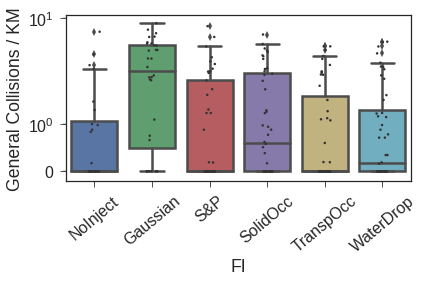

In [5]:
#(GeneralCollisions)/km by FI

ax = sns.boxplot(x='FI', y='col_gen', data=infract_data)
sns.stripplot(x='FI', y='col_gen', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('General Collisions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

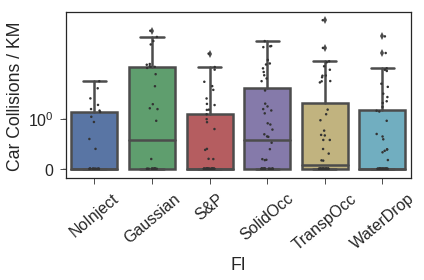

In [6]:
#(CarCollisions)/km by FI
ax = sns.boxplot(x='FI', y='col_car', data=infract_data)
sns.stripplot(x='FI', y='col_car', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Car Collisions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


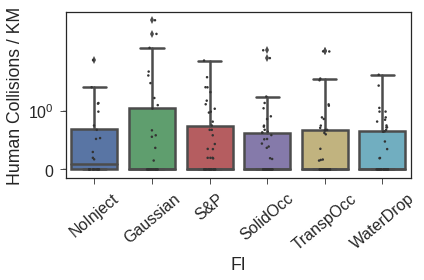

In [7]:
#(HumanCollisions)/km by FI
ax = sns.boxplot(x='FI', y='col_hum', data=infract_data)
sns.stripplot(x='FI', y='col_hum', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Human Collisions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

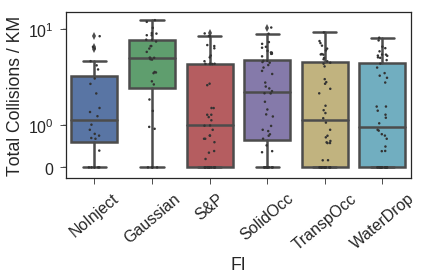

In [8]:
#(TotalCollisions)/km by FI
ax = sns.boxplot(x='FI', y='col_total', data=infract_data)
sns.stripplot(x='FI', y='col_total', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Total Collisions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

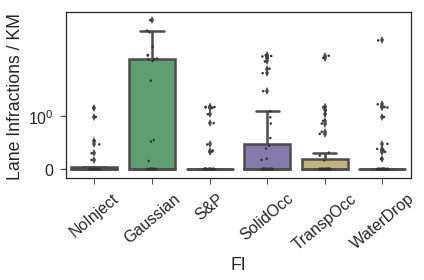

In [9]:
#(LaneInfractions)/km by FI
ax = sns.boxplot(x='FI', y='lane_out', data=infract_data)
sns.stripplot(x='FI', y='lane_out', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Lane Infractions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

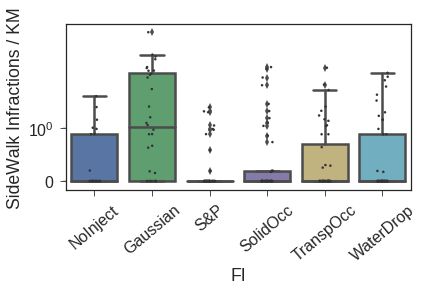

In [10]:
#(SideWalkInfractions)/km by FI
ax = sns.boxplot(x='FI', y='swalk_out', data=infract_data)
sns.stripplot(x='FI', y='swalk_out', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('SideWalk Infractions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

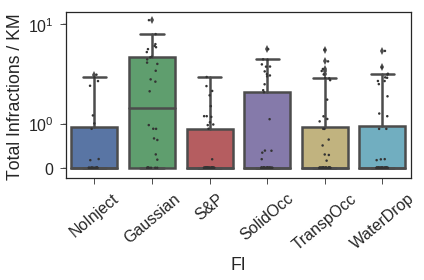

In [11]:
#(TotalInfractions)/km by FI
ax = sns.boxplot(x='FI', y='infrac_total', data=infract_data)
sns.stripplot(x='FI', y='infrac_total', data=infract_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Total Infractions / KM')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

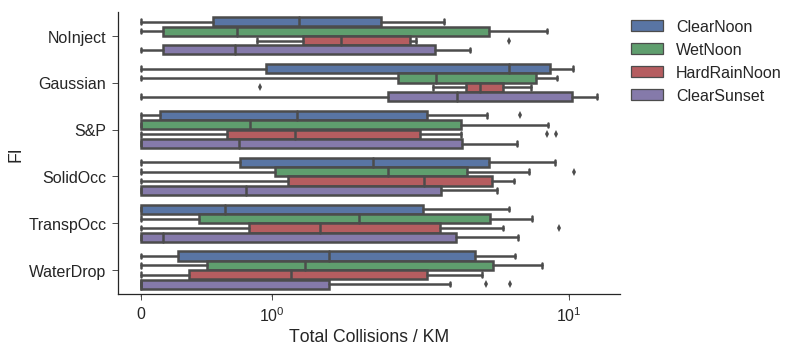

In [12]:
# FI vs Collisions/KM
ax = sns.factorplot(x="col_total", y="FI", hue="Weather", data=infract_data,
                    kind="box", orient="h", size=5, aspect=16/9, legend=False)
ax.set_axis_labels('Total Collisions / KM', 'FI')
ax.ax.set_xscale('symlog')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# format_figure(ax)
plt.tight_layout()
plt.show()
    

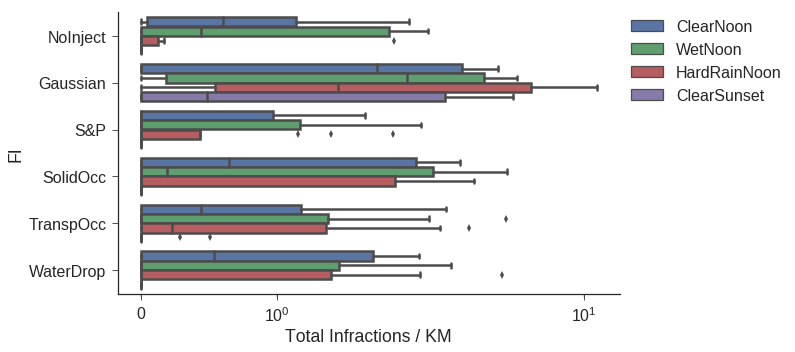

In [13]:
# FI vs Infractions/KM
ax = sns.factorplot(x="infrac_total", y="FI", hue="Weather", data=infract_data,
                    kind="box", orient="h", size=5, aspect=16/9, legend=False)
ax.set_axis_labels('Total Infractions / KM', 'FI')
ax.ax.set_xscale('symlog')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# format_figure(ax)
plt.tight_layout()
plt.show()
    

In [14]:
completion_data = pd.DataFrame(columns=['FI', 'Town','Weather','CompletionTime'])

weather_id_name=['Default','ClearNoon','CloudyNoon','WetNoon','WetCloudyNoon','MidRainyNoon',
                 'HardRainNoon','SoftRainNoon','ClearSunset','CloudySunset','WetSunset',
                 'WetCloudySunset','MidRainSunset','HardRainSunset','SoftRainSunset']


for FI in DATASET:

    df = FI.get_exp_by_pose_type()
    
    completion_times=df[["exp_id","final_time"]].values
    
    for entry in completion_times:
        completion_data = completion_data.append({
            'FI':FI.get_fi_name(),
            'Town':FI.get_town_name(),
            'Weather':weather_id_name[weather_id],
            'CompletionTime':entry[1]},ignore_index=True)


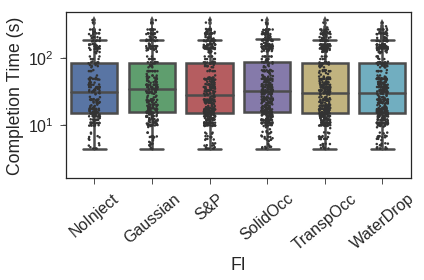

In [15]:
#Completion Times by FI
ax = sns.boxplot(x='FI', y='CompletionTime', data=completion_data)
sns.stripplot(x='FI', y='CompletionTime', data=completion_data, color='0.2', jitter=True, marker=".")
ax.set_yscale('symlog')
ax.set_ylabel('Completion Time (s)')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

In [16]:
success_data = pd.DataFrame(columns=['FI', 'Town','Weather','SuccessRate'])

weather_id_name=['Default','ClearNoon','CloudyNoon','WetNoon','WetCloudyNoon','MidRainyNoon',
                 'HardRainNoon','SoftRainNoon','ClearSunset','CloudySunset','WetSunset',
                 'WetCloudySunset','MidRainSunset','HardRainSunset','SoftRainSunset']


for FI in DATASET:
    df = FI.get_exp_by_pose_type()
    unique_ids=np.unique(df["exp_id"].values)
    
    for exp_id in unique_ids:
        exp_df = df.loc[df["exp_id"]==exp_id]
        
        reached=0
        total=0
        for index,row in exp_df.iterrows():
            if(row['final_time']<row['time_out']):
                reached+=1
            total+=1
        success_rate=reached/total*100
        success_data = success_data.append({
            'FI':FI.get_fi_name(),
            'Town':FI.get_town_name(),
            'Weather':weather_id_name[weather_id],
            'SuccessRate':success_rate},ignore_index=True)

    

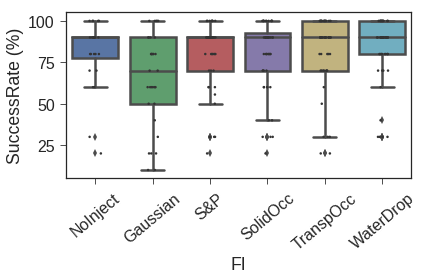

In [17]:
#SuccessRates
ax = sns.boxplot(x='FI', y='SuccessRate', data=success_data)
sns.stripplot(x='FI', y='SuccessRate', data=success_data, color='0.2', jitter=True, marker=".")
ax.set_ylabel('SuccessRate (%)')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()